<h1><center> TMDB Data Exploration</center></hi>

_<h3><center> This notebook has been created to look into the data provided from the TMDB database, investigating the data and creating findings based on historical movie data </center></h3>_

<h3><u> Table of Contents </u></h3>
<br>

* <h4> Introduction </h4>
    
    * <h5>Objectives</h5>
    * <h5>Data Understanding</h5>
* <h4> Data Cleaning </h4>

    * <h5>Null Handling</h5>
    * <h5>Data Type Changing</h5>
    * <h5>Data Reformating</h5>
    * <h5>Data Manipulation</h5>
    
* <h4> Yearly Analysis </h4>

    * <h5>By Rating</h5>
    * <h5>By Revenue</h5>
* <h4> Category Analysis </h4>

    * <h5>By Genre</h5>
    * <h5>By Runtime</h5>
* <h4> Top 10 Analysis </h4>

    * <h5>By Popularity</h5>
    * <h5>By Profit</h5>
* <h4> Film Comparison </h4>





<br>
<br>
<u><h2> Introduction</h2></u>

<br>
<h5>This section has been created to give an insight into the dataset, the key features and what will be analysed.</h5>

The key data featured in this dataset will fall into three main categories:

* Film Descriptions
    * E.g. Titles, languages, genres
* Financial Statistics
    * E.g. Budget, Revenue
* Audience Reception
    * E.g. Popularity, Ratings, Rating Counts

We will look at different relationships between the data for each of these groupings through our EDA. This will help us to form our objectives.

<h3>Objectives</h3>

* Discover which years housed the most successful releases.
* Understand which genres are the most popular
* Learn more about film runtimes
* Discover the top 10 films across different metrics
* Compare two highly successful films from different periods and discover any relations

<h3>Data Understanding</h3>


Firstly, we will begin our exploration by simply coming to terms with the data set. This stage will come before our data checking and clean up stage, just so that we understand what we are working with. This will become useful when looking at data types or unique identifiers down the line. However, to do this, we must firstly get our data ready to be interpreted.

__Step 1__

Data and Python library importing:

In [835]:
import pandas as pd # This is the main library used for data analysis.
import seaborn as sns # This is the main library used for data visualisation.
import matplotlib.pyplot as plt # This is the library we will use to create good-looking graphs and diagrams down the line.

For now, we will stick to using the pandas library as we are in the early exploration and analysis phase. When we get to reporting our findings, we will then use the other libraries to help our findings become more readable. Now it is time to import our data from the csv file provided.

In [837]:
TMDB_file = "C:\\Users\\Toby\\Documents\\Digital Futures\\Projects\\TMDB Project\\TMDB_movies.csv" # This variable is assigned a string of the pathway to the locally-saved file.
df = pd.read_csv(TMDB_file) # This creates a dataframe which will store all the data imported across from the csv file.

We can check that the import was successful by looking at the first few rows of our new dataframe. It seems as though the data has been imported successfully!

In [839]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


__Step 2__

The next step is conduct surface level analysis of the data we have. We will look at a few different descriptive findings.

*1) Dataframe shape*
   
   This will let us know how many rows and columns we will be dealing with. Bare in mind, this number may change as we conduct further analysis or clean our data

In [841]:
df.shape # Return the row and column count

(4803, 20)

We now know we have nearly 5000 movies to analyse in this dataset from the beginning, each with 20 different features relating to them.

*2) Dataframe data types*

   This is important as we can check what format of data we will be working with and we are able to check they are all correct to begin with

In [844]:
df.dtypes # Display the data types for each column

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Looking at this, we see almost all the data is in an appropriate data type. However, we can see one outlier to this trend. 'release_date' is currently stored as an object, while we would most likely want this to be in a date format. We will address this in our cleaning stage. *Spoiler Alert*, from our check of the data previously, we can also see that there are some columns where the data is stored in the correct type, however the format is incorrect. This will also be addressed later.

*3) Uniqueness and Nulls*
   
    Here, we will be able to find whether there are any unique columns that can be used as identifiers or whether there are any issues that we may have to address regarding the presence of null values

In [847]:
df.nunique() # Return a count of all the unique values per column

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

This has allowed us to understand the data a bit more. We now see, thanks to our 'shape' analysis, that the only column with a unique value in every row is, unsurprisingly the 'id' column. This helps us be confident in the avoidance of data redundancy also. Now time to check for null values.

In [849]:
df.isna().sum() # This will assign each value a 1 if null or a 0 if not null. 
                # By summing, we can see that any column > 0 will hold null values. Later, we will use this to decide how we handle these nulls

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We can see that two columns, 'homepage' and 'tagline' are full of null values. However, these columns will not be used for the analysis down the line. As a result, it is safe for us to drop them from the dataframe.

In [851]:
df.drop(columns = ['homepage', 'tagline'], inplace = True) # Removes the two columns we won't need that are full of nulls

Now, if we check the null count, we will see there are a handful of movies that are missing data. These nulls will be sorted later on.

In [853]:
df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

<h3><center>That completes our introduction into the data. We have learnt about the data, what is stored within and have checked over for consistency. Now we will look to clean our data, ready for analysis.</center></h3>

<br>
<br>
<u><h2> Data Cleaning</h2></u>

<br>
<h5>This section has been created to clean the data, ensuring all data is available and ready to be used for analysis.</h5>

The main changes happening in this section will be the following:

* Null Handling
* Data Type Changing
* Data Reformating
* Data Manipulation

Once we have completed this, we will have a clean dataframe which we can create our findings based on.

<h3>Null Handling</h3>


As we saw in the previous section, the null values in the dataset represent a very small amount of the data we have (6 nulls in a dataframe of nearly 5000 rows and *now* 18 columns). As such, we know removing these will have very little impact on the trend, and so that is what we will do.

In [859]:
df.dropna(
    axis = 0, # Defines the want for the individual row to be deleted
    how = 'any', # Drops the row if any null value is present
    subset = ['overview', 'release_date', 'runtime'],  # Subset shows which columns to find null values in. We are using our findings from the previous section.
    inplace = True # Commit the changes to the dataframe
)

Now, we can run our null sum code again to see that there are no null values left in our data. This dataframe is no cleared of nulls and this stage is complete!

In [861]:
df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

<h3>Data Type Changing</h3>


Moving on to our data type findings from earlier, we remember that the 'release_date' column is not in the ideal data type at the moment. Lets change that into a datetime format.

In [864]:
df['release_date'] = pd.to_datetime(df['release_date']) # This assigns the old column onto itself, this time with the dates converted into the datetime data type.

In [865]:
df.dtypes

budget                           int64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

<h3>Data Reformatting </h3>


Within our dataframe, there are a few examples of data which is unhelpful or misleading when it comes to being used for analysis. That is why this next section is here; to reformat this data into a structure which is usable and will not skew or interfere. Our first issue comes with the presence of fake nulls.

__Stage 1__

Within some columns, such as 'budget' or 'revenue', there are values of 0. This is obviously not true; films must have a budget to be made for example and, as a result, this suggests that this data was simply missing. To fix this issue and to stop it from skewing our future analyses, we will convert these values into nulls so they are not considered. 

First of all, lets find out how many films have this issue.

In [868]:
(df[(df['budget'] == 0) | (df['revenue'] == 0)].shape[0]) / df.shape[0] *100 # Find the films where budget or revenue are 0 and calculate the %age of total films this makes up

32.715148989372786

As we can see, 32.7% of films have a 0 in either column. This is a significant amount which we wouldn't be able to simply remove as it will affect our findings. As such, we will have to handle this in a different way. Lets assign these values to nulls so they cannot be used in calculations.

In [870]:
df['budget'] = df['budget'].replace(0, pd.NA) # Replaces all 0s in the two columns with a null value

In [871]:
df['revenue'] = df['revenue'].replace(0, pd.NA)

__Stage 2__

Our second reformatting stage comes with regards to the genres column. If we extract a piece of this column, we can show more clearly the issue we have.

In [873]:
df['genres'].head(1)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

While on the surface, it seems like a list of dictionaries, we are actually dealing with strings here which makes it tough to work with. As such, we want to extract each genre and append it into one single list of genres per film. Using the 'ast' library, we are able to analyse strings that appear to represent other data structures, in this instance a dictionary.

In [875]:
import ast # Loads in a new library to allow for manipulation
ast.literal_eval(df.genres[0])[0]['name'] # This firstly selects the genre column and returns the first entry
                                          # Then, it converts this into a list of dictionaries, or in this case, a single dictionary in a list that we can use.
                                          # After this, it selects the first dictionary and returns the value relating to the name.

'Action'

Now that we've seen that we are able to extract the names of genres, lets create a function which will convert the genres column into an updated version where they are stored in a list.

In [877]:
def extract_genres(x): #Function to extract genres for each datapoint.
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate through each entry in the dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the list of genres
    return Genres

## Apply the function to genres
df['genres'] = df['genres'].apply(extract_genres)

Now, if we check our dataframe again, we will see that our genres are now stored in lists which makes it a lot easier for us to conduct analysis on!

In [879]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


<h3>Data Manipulation </h3>


The final stage of our data cleaning process is more of data addition process. We have some data available to us that could be useful in other ways. We are going to create two new columns which will help our analysis:

* Year - A column dedicated to showing the year that the film was released in
* Runtime - A calculated column which will categorise film run times into 3 groups - Short, Medium and Long
* Profit - Using the budget and revenue columns, we can calculate the profitability of each movie (as long as it has both these values available)

__Year Column__

When looking at yearly figures, it would be useful to have an easily accessible column showing release year, so lets extract that from our datetime column.

In [882]:
df['year'] = df['release_date'].dt.year # Using pandas, we are able to extract only the year part of the datetime values and add them into a newly defined column

__Runtime Grouped Column__

Our column for runtime is tough to consider on its own, there are so many individual values that it will be hard to easily display this quality in visualisations so lets categorise them instead. Short films will be considered <= 100 minutes, medium films considered > 100 minutes but < 140 minutes and anything longer will be considered a long film.

In [884]:
def runtime_group(x): # Function used to group 'runtime' column
    if x <= 100:
        return 'Short'
    elif x > 100 and x < 140:
        return 'Medium'
    else:
        return 'Long' # Depending on the value passed into the function, the appropriate categorisation is returned

df['runtime_group'] = df['runtime'].apply(runtime_group) # Extracts each value of runtime, passes it through the function and assigns it to the respective row in the newly defined column



__Profit Column__

When creating our profit column, we need to consider that not every film will have both a budget and a revenue value as some now have null values due to our previous cleaning. That being said, in columns where both are present, we want to apply the formula 'revenue - budget' in order to find the profit made by each movie.

In [887]:
df['profit'] = df['revenue'] - df['budget'] # Creates the new column and assigns our profit value

df['profit'] = df['profit'].where(df['revenue'].notna() & df['budget'].notna(), pd.NA) # If there is a null value in the row, then the profit also becomes null to avoid inconsistency
                                                                                        # However, if not, the value remains the same 

Now that we have completed our data manipulation and created our new columns, lets check the dataframe to ensure that our data is there as intended

In [889]:
df.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,runtime_group,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009,Long,2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,Long,661000000
2,245000000,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015,Long,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012,Long,834939099
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012,Medium,24139100
5,258000000,"[Fantasy, Action, Adventure]",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576,2007,Medium,632871626
6,260000000,"[Animation, Family]",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330,2010,Short,331794936
7,280000000,"[Action, Adventure, Science Fiction]",99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767,2015,Long,1125403694
8,250000000,"[Adventure, Fantasy, Family]",767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id

<h3><center>Our data cleaning process is complete and we have all we need to begin our analysis. Lets get started!</center></h3>

<br>
<br>
<u><h2> Yearly Analysis</h2></u>

<br>
<h5> Lets get our analysis underway with a look into the yearly changes in two different measurements: user reception and financial performance. </h5>

__User Rating Analysis__

Our first insight will be into whether average user ratings have changed over the years. Perhaps in recent times people have become more cynical as the possibilities of the medium of film have increased. Maybe people have instead become more lenient with their ratings as they look for more escapes through films. Lets investigate.

From now on, we will begin using the libraries we imported at the beginning of this notebook - seaborn and matplotlib - to create visualisations of our findings.

In [894]:
year_filtered = df.groupby('year').filter(lambda x: len(x) >= 10) # Removes films where the year it was released in has less than 10 films 

rating_by_year = year_filtered.groupby('year')[['vote_average']].mean() # Displays the average user rating for each year with at least 10 films

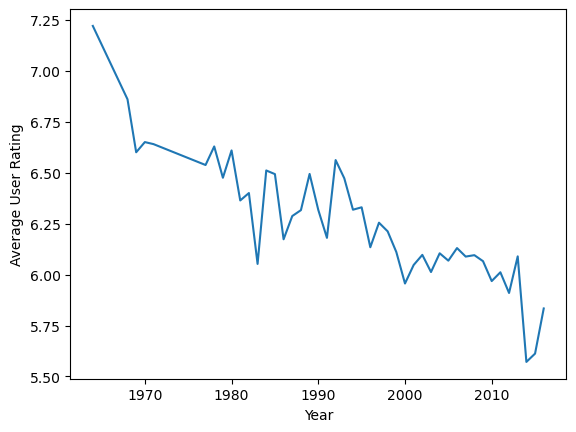

In [895]:
sns.lineplot(data = rating_by_year,
           x = 'year',
           y = 'vote_average') # This code will be appearing a lot - this is used to create a graph of the defined type, assign the dataframe used and specific columns for 
                               # each axis. Sometimes, a colour palette will also be applied

plt.ylabel('Average User Rating')
plt.xlabel('Year') # These two are used to edit the axis label
plt.show() # Used to present the visualisation

This creates our first important finding - the film industry over the years has seen a decline in the average ratings given out to films. But why is this, what could have caused this?

> According to [Cary O'Dell](https://www.popmatters.com/why-so-many-bad-movies), there are a few reasons we should consider that may have had an impact. These include the following:
> * The increasing ease of access of film-making equipment - this can allow for smaller studios/independent films which can often be not of the highest quality
> * Films are facing increase competition from TV or other video sources - this can make the video media appear of lower quality compared to some of the best through other areas
> * Greater knowledge of the film-making process can cause us to be more judgemental
<br>
<br>
This is all interesting to consider as we continue our analysis into financial success and, on a closer level, into categorical or individualised analyses.

Having seen a decline in audience reception, lets check the average revenue per year to see if this trend is the same. 

In [897]:
year_filtered = df.groupby('year').filter(lambda x: len(x) >= 10) # Removes films where the year it was released in has less than 10 films 

revenue_by_year = year_filtered.groupby('year')[['revenue']].mean() # Displays the average user rating for each year with at least 10 films

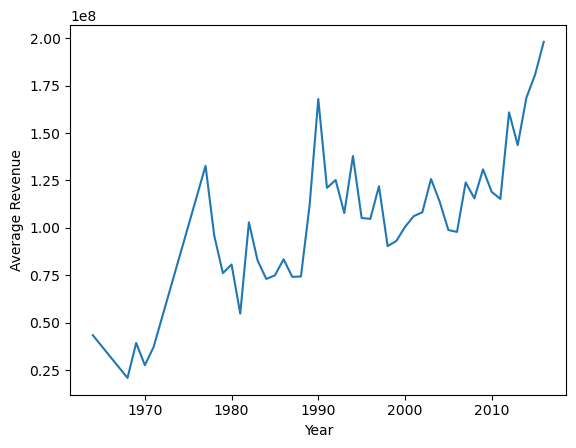

In [898]:
sns.lineplot(data = revenue_by_year,
           x = 'year',
           y = 'revenue')

plt.ylabel('Average Revenue')
plt.xlabel('Year')
plt.show()

Naturally, we expect to see an upwards trend, especially in recent times, as the film industry grows and inflation becomes involved. However, we can see something very interesting. Where user ratings fell from an average of around 6.50 down to 6 from the mid-90s to the mid-2000s, we actually saw a fairly steady rate of average revenue compared to the rest of the line which is trending upwards. This is interesting, where the rest of the years seemed to have a small correlation between the ratings and the revenue due to societal factors, this period seemed to be a lot more closely correlated. Around this time, many films were trying to compete with the release of large blockbusters from the previous decade or so, including films like Star Wars, Back to the Future or Top Gun. As such, companies perhaps created a decline in quality with this chase for success and it was around here that the lag from the effect began to impact viewers' mentality, causing a decline in spending to watch new films.
<br>

<h3><center>This was an interesting insight into the film industry as a whole - we have seen a general decline in reception of new films, however, films have generated a substantial increase in revenue, largely thanks to increasing prices, population growth and greater availability. Lets move into a closer look at films when categorised</center></h3>

<br>
<br>
<u><h2> Category Analysis</h2></u>

<br>
<h5> Having seen the trends of the industry, it would be nice to break that down into more specific groups. Lets see if key features of films have any bearing on their popularity. </h5>

__Popularity by Genre__

The first feature I wanted to investigate was genres. It would be interesting to see which film genres are the most popular and also whether this has changed from 30 years ago. Have the most popular genres changed over time as better films come out across genres or as taste changes.

In [903]:
genre_explo = df.explode('genres') # Create a new row for each genre that a film is in
genre_explo_90s = genre_explo[genre_explo['year'].between(1990, 1999)]
genre_explo_10s = genre_explo[genre_explo['year'].between(2010, 2019)] # filter out films into their own dataframe depending on which decade they belong to
genre_mean_pop_90s = genre_explo_90s.groupby('genres')[['popularity']].mean()
genre_mean_pop_10s = genre_explo_10s.groupby('genres')[['popularity']].mean() # Find the mean popularity within each genre
genre_mean_pop_90s['decade'] = '1990s'
genre_mean_pop_10s['decade'] = '2010s' # Add a column to show which decade this relates to 

decade_genre_pop = pd.concat([genre_mean_pop_90s, genre_mean_pop_10s]) # Combine both decades into one dataframe

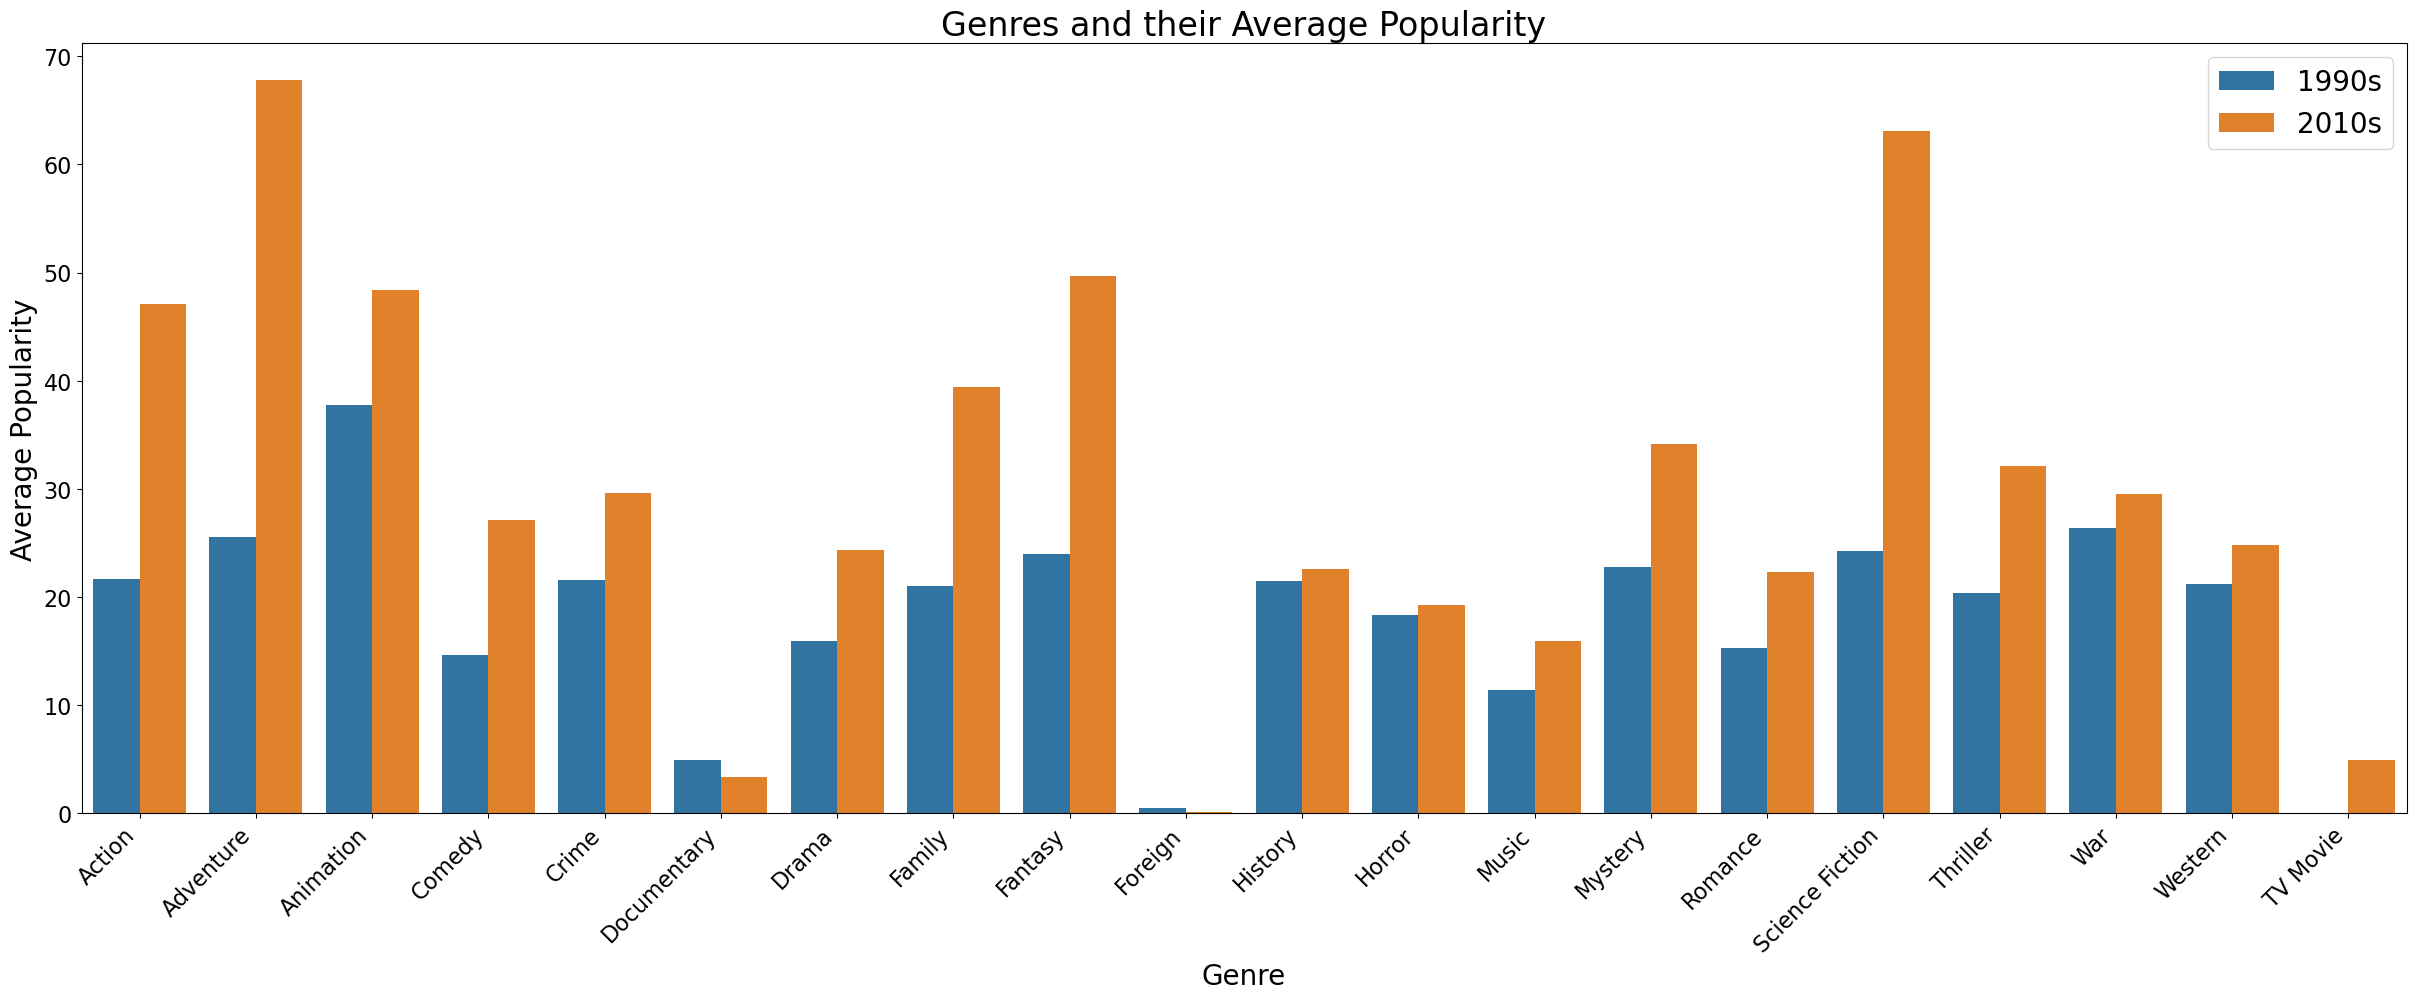

In [904]:
plt.figure(figsize = (30,10))

sns.barplot(data = decade_genre_pop,
            x = 'genres',
            y = 'popularity',
           hue = 'decade') # Defining a barplot to show our findings, coloured based on the decade which the number relates to

plt.title('Genres and their Average Popularity', fontsize = 24)
plt.legend(fontsize = 20)


plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontsize = 16)
plt.yticks(fontsize = 16)

plt.ylabel('Average Popularity', fontsize = 20)
plt.xlabel('Genre', fontsize = 20) # Formatting the graph, increasing fontsizes, creating readable labels and insert a title

plt.show()

This has given us an interesting set of findings. Naturally, we see an increase in popularity in almost all categories due to greater public reach and increased access to these films, however, the amount of change is particularly interesting. Films with a more historical backdrop ('History', 'Western', 'War') seem to have a very small rise in popularity, if not a decrease. This suggests that films in these genres are particularly niche even today and are facing an uphill battle to become huge successes. On the other hand, in the 20 year span, we can see a huge increase in specific 'larger-than-life' genres such as Adventure or Sci-Fi. This points towards a greater demand for highly creative films with expansive ideas, potentially as people expect greater stories and more escapes from life through film. It would be interesting to confirm that the most successful films of all time lie within these large growth genres, something we will explore later! For now, lets inspect the impact a film's length has on the amount of reviews that it would get. Does the runtime put viewers off?

In [906]:
mean_votes_runtime = df.groupby('runtime_group')[['vote_count']].mean() # Grouping previously defined runtime groups by their average vote count

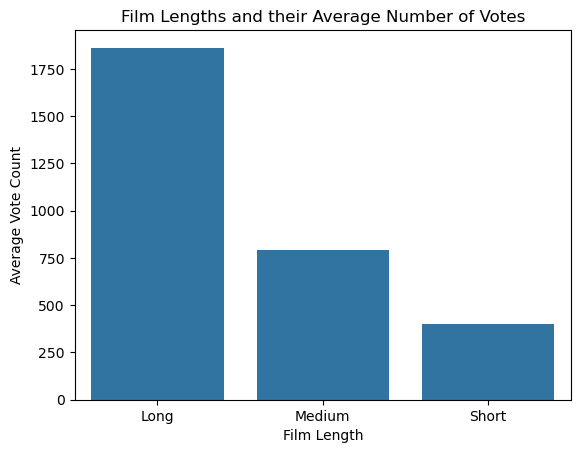

In [907]:
sns.barplot(data = mean_votes_runtime,
        x = 'runtime_group',
        y = 'vote_count')


plt.title('Film Lengths and their Average Number of Votes')

plt.ylabel('Average Vote Count')
plt.xlabel('Film Length') 

plt.show()
            

<br>
<br>
<u><h2> Top 10 Analysis</h2></u>

<br>
<h5> Now that we have seen what factors are important in a films success, and how this may be impacted by the industry trends as a whole, lets look closely at the top 10 films, both based off of financial data and also public reception. </h5>

__Top 10 Films by Profit__

Lets begin our look into films by analysing which films were the top 10 most profitable of all time. It will be interesting to see if this follows what we have seen to be the 'recipe for success': falling into popular categories, releasing in successful industry periods and being of a good length

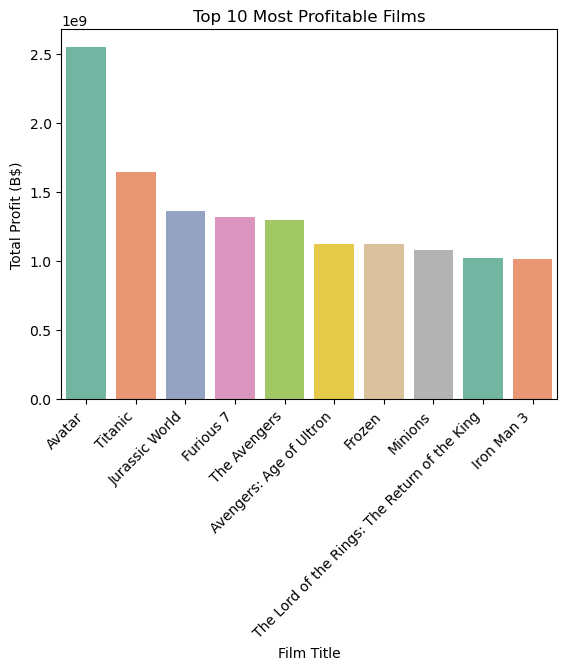

In [911]:
top_10_profit = df.sort_values(by = 'profit', ascending = False).head(10)

sns.barplot(data = top_10_profit,
            x = 'title',
            y = 'profit',
            hue = 'title',
           palette = 'Set2')

plt.title('Top 10 Most Profitable Films')

plt.xticks(rotation = 45,
           horizontalalignment = 'right')

plt.ylabel('Total Profit (B$)')
plt.xlabel('Film Title') 

plt.show()

This graph shows us the most profitable films. As we can see, they all have most, if not all, the characteristics that we expect. They are predominantly from the 2010s, the period where revenue took the sharpest increase, and are mostly from the genres that we saw to have the highest levels of popularity. Additionally, they are almost all long or medium length which again enforces the idea that these are the most popular film types as seen by the vote count qualifications. This tells us that we should focus on films with similar qualities when giving recommendations as they have proven themselves to bring the most viewership and income.

This being said, there are two exceptions. Firstly, Titanic is from before the turn of the millenium, something they should receive a large amount of credit for since we saw this to be a tough period for making money through film. We can likely accredit this to the subject matter being something everyone knows about while remaining interesting for storytelling. Also, and perhaps more interestingly as we will see, Minions did not follow these trends. It only belongs to one major genre (Adventure) and has a short runtime of 91 minutes. This success, combined with the next topic, make this an interesting case.

__Top 10 Films by Reception__

To determine whether profitability = popularity, we will check the top 10 most popular films also and cross compare.

In [914]:
top_10_pop = df.sort_values(by = 'popularity', ascending = False).head(10)

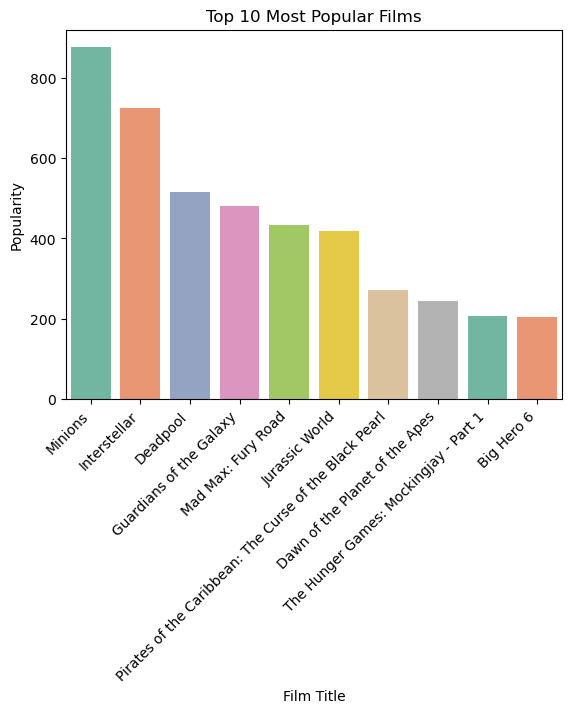

In [915]:
sns.barplot(data = top_10_pop,
            x = 'title',
            y = 'popularity',
            hue = 'title',
           palette = 'Set2')

plt.xticks(rotation = 45,
           horizontalalignment = 'right')

plt.title('Top 10 Most Popular Films')

plt.ylabel('Popularity')
plt.xlabel('Film Title') 

plt.show()

In [916]:
vote_count_filt = df[df['vote_count']>100]
top_10_rating = vote_count_filt.sort_values(by = 'vote_average', ascending = False).head(10)

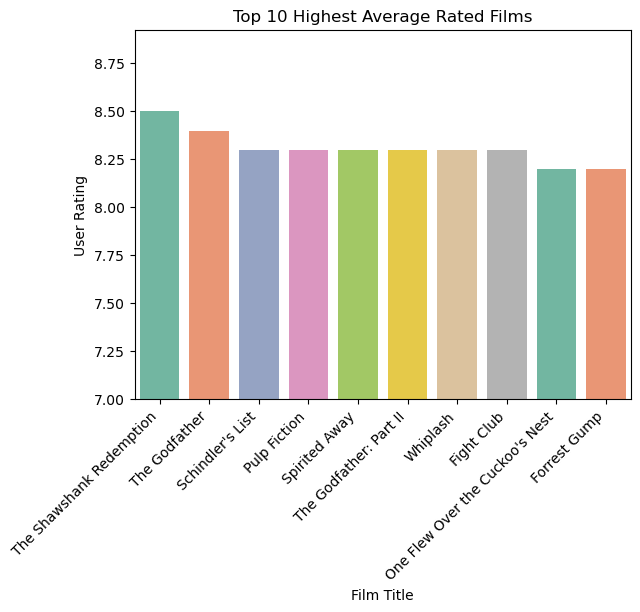

In [917]:
sns.barplot(data = top_10_rating,
            x = 'title',
            y = 'vote_average',
            hue = 'title',
           palette = 'Set2')

plt.xticks(rotation = 45,
           horizontalalignment = 'right')

plt.title('Top 10 Highest Average Rated Films')

plt.ylabel('User Rating')
plt.xlabel('Film Title') 

plt.ylim(7, None)

plt.show()

Here we can see that only Minions is in both popularity and profitability - continuing from our point of Minions being an outlier, it breaks the rules across every metric. It is highly profitable but also incredibly popular while following very few of the key success metrics!

Most of the profitable films tend to be films that are part of larger franchises, which makes sense as these universes tend to gain large, loyal fandoms that are willing to go and see these big spectacles no matter what while they are also available and easy to follow for less attached viewers. This could be a useful point for a recommendation system as we can see whether someone is a fan of previous installments and use this to extrapolate an appreciation for other films in the series. Once again, these films almost entirely fulfill the criteria we defined previously.

That being said, if someone is looking for quality, it would be suggested that franchises are avoided. Most of the films from this list are outside of major franchies (besides The Godfather and its sequel!) and focus on specific stories. That being said they do have some key trends behind them. They do tend to lie within the most popular genres, however, as we saw previously, most quality comes from before 2000. This graph here reinforces that idea. 

<h3><center>We've now looked more closesly on a film-by-film basis and where the success stories in cinema history lie and whether they follow general industry trends. For the most part, it is closely tied to this, an interesting point to consider when forming a recommendation system. Lets have a look more closely at a film comparison between</center></h3>

<br>
<br>
<u><h2> Film Comparison</h2></u>

<br>
<h5> To round out our analysis, lets take a look at two specific films to see how films have changed over time. </h5>

Let's select our films based on the highest rated films of all time. From the list below which filters out low frequency years and films with very low vote counts, we will look at two films.

In [923]:

year_vote_filt = year_filtered[year_filtered['vote_count']>500] # Uses our year filter from earlier to remove low frequency years and low vote count films

year_vote_filt.loc[year_vote_filt.groupby('year')['vote_average'].idxmax(), ['year', 'title', 'vote_average']] # finds the index of the max rated film
                                                                                                               # Locates that specifc row by index
                                                                                                               # Then returns the 3 columns we need 

,year,title,vote_average
4173,1964,Dr. Strangelove or: How I Learned to Stop Worr...,8.0
3622,1968,Once Upon a Time in the West,8.1
3447,1969,Butch Cassidy and the Sundance Kid,7.4
3928,1971,Willy Wonka & the Chocolate Factory,7.4
2912,1977,Star Wars,8.1
2536,1978,The Deer Hunter,7.8
1525,1979,Apocalypse Now,8.0
1990,1980,The Empire Strikes Back,8.2
2860,1981,Das Boot,7.9
1725,1982,Blade Runner,7.9


<h3> Our two films for comparison will be the following: Star Wars (1977) and Se7en (1995). Lets see how these very different films compare!</h3>

In [925]:
df[df['title'].str.match('Se7en|^Star Wars$')][['title', 'release_date', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue', 'profit', 'runtime', 'runtime_group', 'genres']]

,title,release_date,vote_average,vote_count,popularity,budget,revenue,profit,runtime,runtime_group,genres
1553,Se7en,1995-09-22,8.1,5765,79.579532,33000000,327311859,294311859,127.0,Medium,"[Crime, Mystery, Thriller]"
2912,Star Wars,1977-05-25,8.1,6624,126.393695,11000000,775398007,764398007,121.0,Medium,"[Adventure, Action, Science Fiction]"


Thes two films are very interesting cases. While they are the most popular films nearly 20 years apart, there are some key similarities which help to once again reinforce ideas and a major difference which may explain some differences.

First of all, both films are barely over two hours long, a key point as it removes time as a limiting factor on why people wouldn't watch the film. This is likely a key contributor to its high vote count and something that would be important to consider - most films in this time frame would expect to see larger vote counts than those in long categories.

Secondly, while we did see that profitability on the high end tends not to have a strong relationship with film quality, now that we are exploring films from a period where films were not generating the same revenue, we can see something interesting. These two films are considered the best of their years and yet we are seeing large levels of profitability in the in 9 figures. Does this mean that if we were to adjust money for inflation, we would see that film profitability may follow different trends to what we expected?

However, the major difference seen between the two films is within their popularity. I will investigate this more now. 

When checking the correlation matrix, we can see what impacts popularity the most within films - vote_count and vote_average

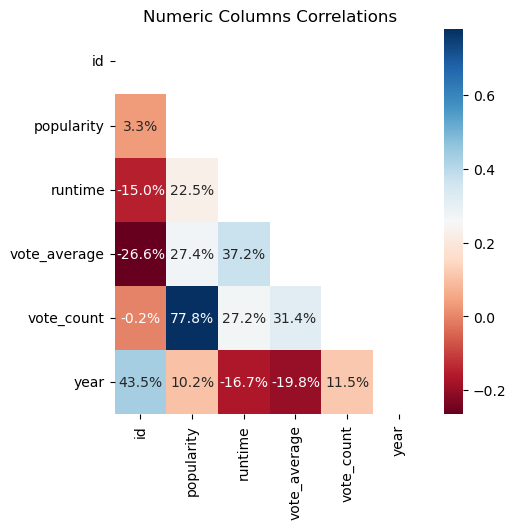

In [970]:
import numpy as np # A library needed to apply a mask to the matrix
plt.figure(figsize = (5,5))
sns.heatmap(data = df.corr(numeric_only = True), cmap = 'RdBu', annot = True, fmt = '.1%', mask = np.triu(df.corr(numeric_only = True))) 

# Creates a heatmap of the correlation matrix using numeric columns, adds a colour scheme, labels and rounding. Then only shows the bottom left half of the graph to avoid overlap

plt.title('Numeric Columns Correlations')

plt.show()

This is a particularly intriguing finding as we can see that both of the most important factors in predicting a high film popularity are present, as we see portrayed by 'Star Wars'. So there must be other explanations?

Well, lets look at what is different between the two films, the major difference being genre.

Se7en is a classified into 3 genres: 'Crime', 'Mystery' and 'Thriller'. Over the years, we have seen these genres be mid-tier genres when it comes to average popularity of films. If we compare this to star wars, there is a huge increase in popularity for its genres such as 'Sci Fi' and 'Adventure'. I believe this suggests to us that determining a films success is most reliant on the genre within which the film falls.

Additionally, as we spotted earlier, films that are part of a franchise tend to hold greater levels of popularity than stand-alone films. This is another key reason for the difference - fans of the star wars franchise are constantly being renewed with new films over the years, leading to greater audience reach for all films, especially the original which we can see have a high level of popularity.

<h3><center>We now know a little more about this database. We have determined the trends within the industry as time has passed, we have grouped films by characteristics to determine their level of significance, we have worked on finding reasoning behind top 10 films in different metrics and have concluded by analysing two historical greats and what gives them the features they possess. 
<br>
<br>
Overall, we have found a conclusion. Genre seems to be the most important factor when determining the success of a film while the story and age of a film tends to be the biggest factor in determining quality </center></h3>